## Practical No. 6

### A. Linear Kernels

#### Introduction
Support Vector Machines (SVMs) are powerful supervised machine learning models used for classification and regression tasks. They are particularly effective for solving binary classification problems, where the goal is to separate data points into two distinct classes based on their features. SVMs can also handle multi-class classification by using various strategies like one-vs-one or one-vs-all.

#### Algorithm Overview
The SVM algorithm aims to find an optimal hyperplane that maximally separates the classes in the feature space. This hyperplane acts as a decision boundary, and data points on different sides of the hyperplane belong to different classes. SVMs have the unique property of maximizing the margin, which is the distance between the hyperplane and the nearest data points of each class.

Here's a step-by-step overview of the SVM algorithm:

1. Data Preprocessing: The dataset is prepared by cleaning, transforming, and scaling the input features as necessary. This step ensures that the data is suitable for the SVM algorithm.

2. Model Training: The SVM model is trained using labeled training data. The algorithm learns the optimal hyperplane by finding support vectors, which are data points that lie closest to the decision boundary. The model aims to maximize the margin between the support vectors of different classes.

3. Kernel Functions: SVMs can utilize kernel functions to handle non-linearly separable data. The kernel function transforms the data into a higher-dimensional feature space, where it may become linearly separable. Common kernel functions include the linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel.

4. Hyperparameter Tuning: SVMs have hyperparameters that need to be set before training. These include the regularization parameter (C) and the kernel-specific parameters (e.g., gamma for the RBF kernel). Hyperparameter tuning techniques like grid search or randomized search can be used to find the optimal combination of hyperparameters.

5. Model Evaluation: The trained SVM model is evaluated using a separate test dataset. Common evaluation metrics include accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC). The model's performance is analyzed to assess its effectiveness in classifying new, unseen data.

6. Prediction: Once the SVM model is trained and evaluated, it can be used to classify new, unseen data points. The model takes the input features, applies any necessary transformations, and predicts the corresponding class label based on the learned decision boundary.

#### Advantages of SVMs
- SVMs can handle high-dimensional data effectively, making them suitable for tasks with a large number of features.
- They are robust to overfitting when the appropriate regularization parameter is chosen.
- SVMs are versatile and can handle both linearly separable and non-linearly separable data through the use of kernel functions.
- They provide a clear decision boundary, which can be useful for interpretability in certain applications.

#### Limitations of SVMs
- SVMs can be computationally expensive, especially with large datasets or complex kernel functions.
- Selecting the appropriate kernel and tuning the hyperparameters can be challenging.
- SVMs may struggle with datasets that have a high degree of overlapping classes or noisy data.

#### Applications of SVMs
- Text classification and sentiment analysis
- Image classification and object recognition
- Bioinformatics and gene expression analysis
- Fraud detection and anomaly detection
- Handwriting recognition and character identification

Support Vector Machines are widely used and have demonstrated their effectiveness in various real-world applications. By leveraging the optimal separation of classes and incorporating non-linear transformations using kernel functions, SVMs provide a powerful framework for classification tasks.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


dataset = datasets.load_iris()


X = dataset.data
y = dataset.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm = SVC(kernel='linear')

svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Accuracy: 0.9


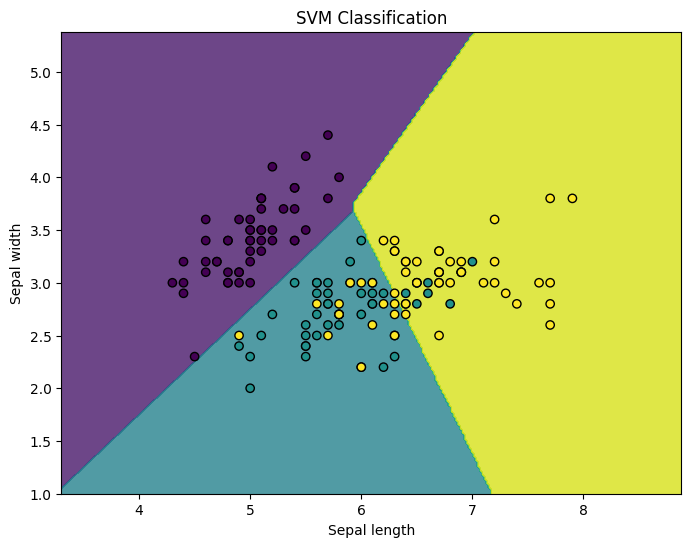

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


dataset = datasets.load_iris()

X = dataset.data[:, :2]
y = dataset.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm = SVC(kernel='linear')


svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Classification')
plt.show()


### RBF Kernel
**Theory:**  
The RBF (Radial Basis Function) kernel is a popular kernel function used in Support Vector Machines (SVM) and other machine learning algorithms. It is commonly used to transform data into a higher-dimensional feature space, allowing SVMs to capture non-linear relationships and find non-linear decision boundaries.

The RBF kernel is defined by the formula:

K(x, y) = exp(-gamma * ||x - y||^2)

In the formula, "x" and "y" represent the input feature vectors, "||x - y||" represents the Euclidean distance between the feature vectors, and "gamma" is a parameter that determines the width of the kernel. The parameter gamma controls the influence of each training example and affects the smoothness and flexibility of the decision boundary.

Here are some key characteristics and properties of the RBF kernel:

1. Non-linearity: The RBF kernel allows SVMs to capture non-linear relationships between input features and class labels. It is particularly useful when the decision boundary between classes is complex and not easily separable by a linear function.

2. Flexibility: The RBF kernel can create decision boundaries of varying shapes, including circles, ellipses, and other non-linear curves. This flexibility enables SVMs to handle datasets with intricate patterns and achieve higher accuracy in classification tasks.

3. Kernel Width: The parameter "gamma" determines the width of the RBF kernel. A smaller gamma value results in a wider kernel, allowing more training examples to influence the decision boundary. Conversely, a larger gamma value leads to a narrower kernel and a more localized decision boundary.

4. Overfitting: The RBF kernel has the potential to overfit the training data if the gamma parameter is set too high. This can result in overly complex decision boundaries that may not generalize well to unseen data. It is essential to tune the gamma parameter carefully to avoid overfitting.

5. Computational Complexity: The computational cost of using the RBF kernel increases with the number of training examples. SVMs with the RBF kernel are computationally more expensive compared to linear SVMs. However, the algorithm can be efficiently optimized using techniques like the kernel trick and support vector selection.

The RBF kernel is widely used in various applications, including image recognition, text classification, and bioinformatics. It provides a flexible and powerful approach for SVMs to handle non-linear data and achieve accurate classification by capturing intricate patterns and decision boundaries.

Accuracy: 0.9


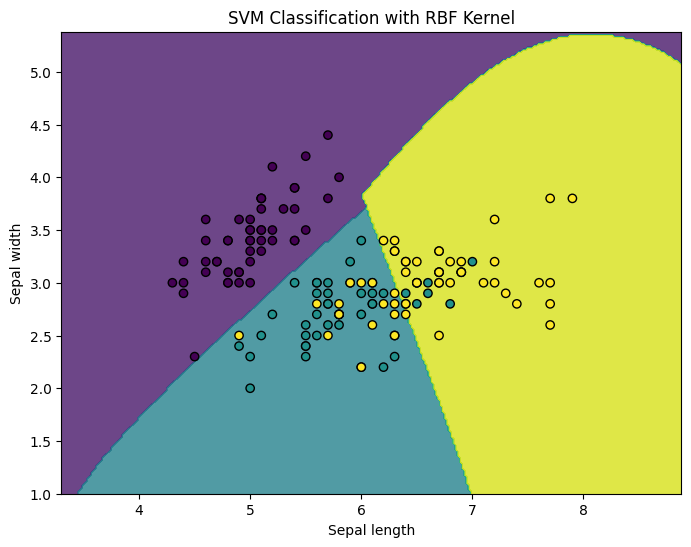

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


dataset = datasets.load_iris()


X = dataset.data[:, :2]
y = dataset.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm = SVC(kernel='rbf')


svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Classification with RBF Kernel')
plt.show()


**Conclusion:** I learnt about SVM.